# Part I - Ford go bike - Trip data
## by Javier Chapto

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [7]:
# load in the dataset into a pandas dataframe, print statistics
bike_share = pd.read_csv('201902-fordgobike-tripdata.csv')

In [8]:
# high-level overview of data shape and composition
print(bike_share.shape)
print(bike_share.dtypes)
print(bike_share.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [9]:
# descriptive statistics for numeric variables
print(bike_share.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?

> There are 183412 rides in the dataset with 16 features.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that distance travelled will have the strongest effect on trip duration. However, other factors such as user_type, member_birth_year, member_gender and bike_share_for_all_trip may also have an effect on trip duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by the main variable of interest (duration_sec) to minutes, so that it's easier to interpret. Then, I will analyze its distribution.

In [10]:
bike_share['duration_min'] = bike_share['duration_sec'] / 60

In [11]:
bike_share.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,26.916667
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,26.166667
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,17.483333


In [12]:
bike_share.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.066667


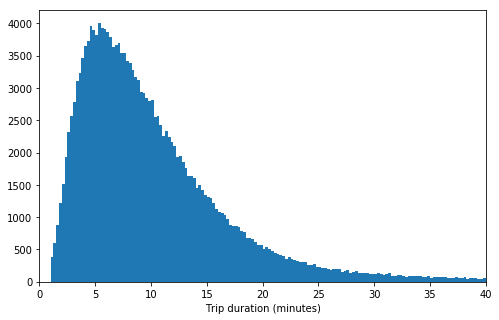

In [13]:
# start with a standard-scaled plot
binsize = 0.25
bins = np.arange(0, bike_share['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'duration_min', bins = bins)
plt.xlim([0,40])
plt.xlabel('Trip duration (minutes)')
plt.show()

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead

In [15]:
np.log10(bike_share['duration_min'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_min, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


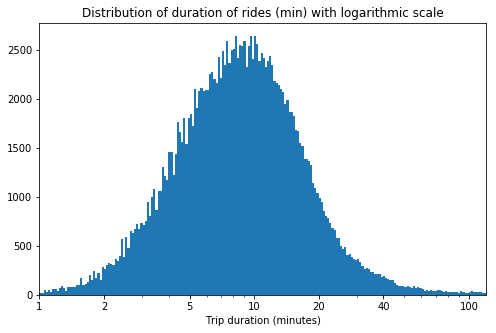

In [16]:
log_binsize = 0.01
bins = 10 ** np.arange(0, np.log10(bike_share['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'duration_min', bins = bins)
plt.title('Distribution of duration of rides (min) with logarithmic scale')
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 40, 100], ['1', '2', '5', '10', '20', '40','100'])
plt.xlabel('Trip duration (minutes)')
plt.xlim([0,120])
plt.show()

Trip duration has a long-tailed distribution (skewed to the right), with a lot of trips in the short trip end, and less on the long trip end. When plotted on a log scale, trip duration seems to adopt a normal distribution, with a peak around 10 minutes.

Next up, the first predictor variable of interest: distance travelled.

In [17]:
# The following formula calculates the distance in kms of each ride, using start_station_latitude, start_station_longitude,
# end_station_latitude and end_station_longitude

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
dtypes: float64(8), int64(2), obj

In [19]:
bike_share['distance'] = haversine_np(bike_share['start_station_longitude'],bike_share['start_station_latitude'],bike_share['end_station_longitude'],bike_share['end_station_latitude'])

In [20]:
bike_share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,0.544367
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,1.741905
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,2.702847
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,0.260575
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,2.407789


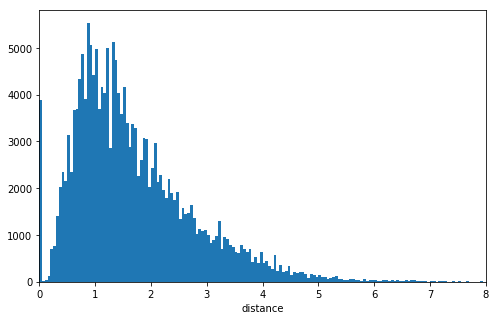

In [21]:
# plotting distance on a standard scale
binsize = 0.05
bins = np.arange(0, bike_share['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'distance', bins = bins)
plt.xlim([0,8])
plt.xlabel('distance')
plt.show()

In [22]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
distance                   183412

In [23]:
bike_share['distance'].describe()

count    183412.000000
mean          1.689598
std           1.096900
min           0.000000
25%           0.910383
50%           1.429839
75%           2.224289
max          69.425625
Name: distance, dtype: float64

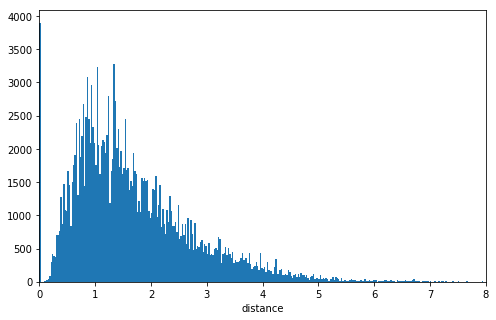

In [24]:
# investigating further on an even smaller bin size
binsize = 0.025
bins = np.arange(0, bike_share['distance'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'distance', bins = bins)
plt.xlim([0,8])
plt.xlabel('distance')
plt.show()

In the case of distance, the small bin size shows a spike at around 1.2 km that may be important.

In [25]:
np.log10(bike_share['distance'].describe())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.263428
mean     0.227783
std      0.040167
min          -inf
25%     -0.040776
50%      0.155287
75%      0.347191
max      1.841520
Name: distance, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


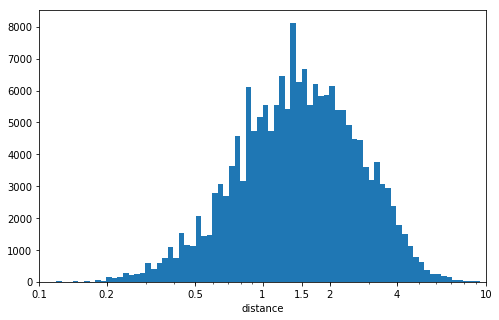

In [26]:
# doing a log transform
binsize = 0.025
bins = 10 ** np.arange(-1, np.log10(bike_share['distance'].max())+log_binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'distance', bins = bins)
plt.xscale('log')
plt.xticks([0.1,0.2, 0.5, 1, 1.5, 2, 4, 10], ['0.1', '0.2', '0.5', '1','1.5', '2', '4','10'])
plt.xlim([0,10])
plt.xlabel('distance')
plt.show()

Distance has a long-tailed distribution (skewed to the right), with a lot of trips in the short distance trip end, and less on the long distance long trip end. When plotted on a log scale, distance seems to adopt a normal distribution, with a peak around 1.5 km .

In [27]:
def myCountPlot(df,xVar,hue=None,color=0,palette=None,order=None,ax=None, figsize=[14,6]):
    if not ax:
        plt.figure(figsize=figsize)
        ax.plt.gca()
    sb.countplot(data=df, x= xVar,hue=hue,color=sb.color_palette()[color],palette=palette,order=order,edgecolor='black', ax=ax);
    xVar=xVar.replace("_"," ")
    if hue:
        hue=hue.replace("_"," ")
    ax.set_title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title() , fontsize = 14, weight = "bold")
    ax.set_xlabel(xVar.title(), fontsize = 10, weight = "bold")
    ax.set_ylabel('Frequency'.title(), fontsize=10, weight="bold")

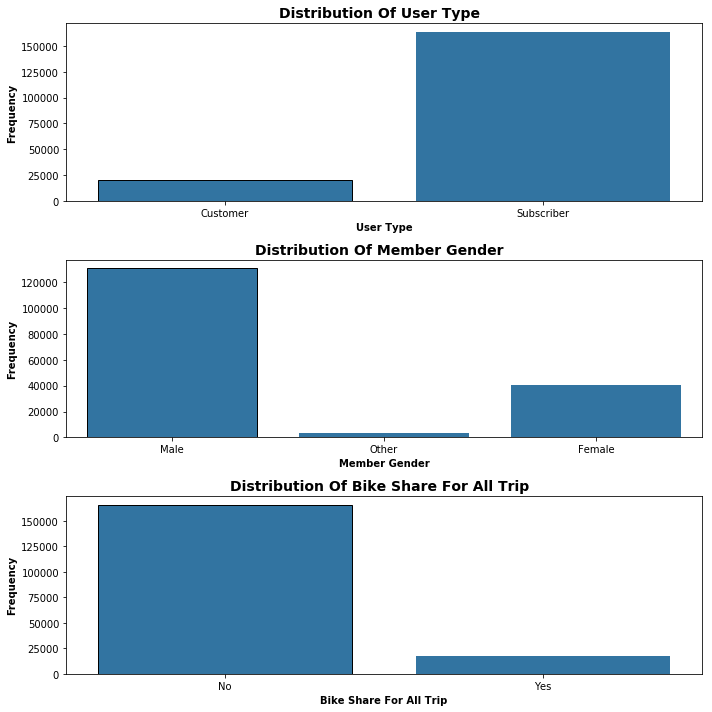

In [28]:
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
myCountPlot(bike_share,'user_type', ax=ax[0])
myCountPlot(bike_share,'member_gender', ax=ax[1])
myCountPlot(bike_share,'bike_share_for_all_trip', ax=ax[2])
plt.tight_layout()

Analyzing the bar charts above, we can see that most of the rides are made by males, suscribers and not involved in the 'bike share for all trip' program.

In [23]:
bike_share_no_nulls = bike_share[bike_share['member_birth_year'].notna()]

(1950, 2010)

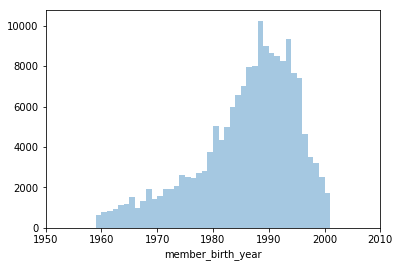

In [24]:
# Standard-scaled plot for birth-date
bin_edges = np.arange(1959, bike_share_no_nulls['member_birth_year'].max()+1, 1)
sb.distplot(bike_share_no_nulls['member_birth_year'], kde=False, bins = bin_edges)
plt.xlim([1950,2010])

Analyzing member_birth_year, we can see that it takes a approximately a normal distribution, with a peak at approximately 1990. However, there in an abrupt limit near 2000, which I assume that is because of the age limit to become a member.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Using a standard plot, trip duration and distance travelled are skewed to the right. However, when they are plotted using a logarithmic scale, they adopt a normal distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For member birth year, the distribution seems normal, but there's a sudden stop, that is probably related to the age limit for the service. For the trip duration, seconds was changed to minutes, so that the time was easier to interpret. Distance travelled was calculated using the haversine_np function, that uses latitudes and longitudes of the start and end points.  

## Bivariate Exploration


I'm going to look at correlations present between features of the data.

In [25]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
distance                   183412

In [26]:
numeric_vars = ['duration_min', 'distance', 'member_birth_year', 'duration_sec']
categoric_vars = ['user_type', 'bike_share_for_all_trip', 'member_gender']

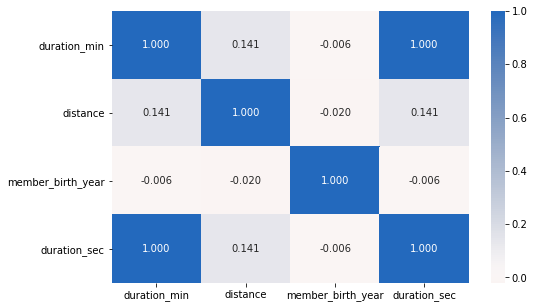

In [27]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_share_no_nulls[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

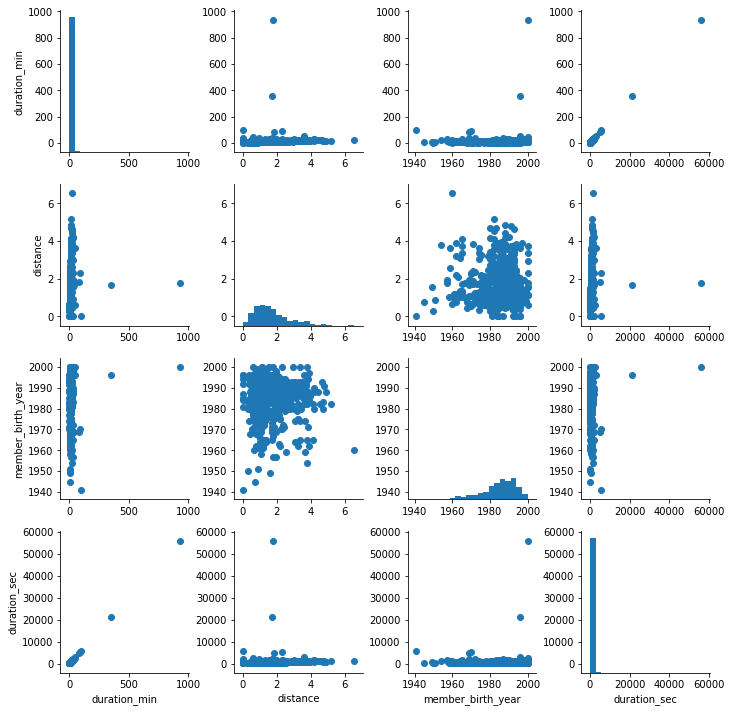

In [28]:
# plot matrix: sample 500 rides so that plots are clearer and they render faster
bike_share_no_nulls_samp = bike_share_no_nulls.sample(n=500, replace = False)

g = sb.PairGrid(data = bike_share_no_nulls_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Surprisingly, there's a weak positive correlation between the distance between the start and end station, and the ride duration. The correlation is just 0.141, lower than expected. There is almost no correlation between distance and member birth year, ride duration and member birth year.

In [29]:
bike_share_no_nulls.distance.describe(np.arange(0,1,0.01))

count    175147.000000
mean          1.688268
std           1.096250
min           0.000000
0%            0.000000
1%            0.000000
2%            0.000000
3%            0.305275
4%            0.368613
5%            0.411884
6%            0.445945
7.0%          0.489078
8%            0.518076
9%            0.550752
10%           0.595395
11%           0.618812
12%           0.638043
13%           0.661330
14.0%         0.686351
15%           0.713996
16%           0.732369
17%           0.751367
18%           0.776588
19%           0.790518
20%           0.818413
21%           0.842432
22%           0.854680
23%           0.870894
24%           0.885017
25%           0.907130
             ...      
71%           2.067742
72%           2.097218
73%           2.138321
74%           2.171296
75%           2.220835
76%           2.277817
77%           2.323809
78%           2.362164
79%           2.411229
80%           2.467265
81%           2.515248
82%           2.576806
83%        

In [30]:
bike_share_no_nulls.duration_min.describe(np.arange(0,1,0.01))

count    175147.000000
mean         11.736864
std          27.360139
min           1.016667
0%            1.016667
1%            1.733333
2%            2.083333
3%            2.350000
4%            2.566667
5%            2.766667
6%            2.933333
7.0%          3.100000
8%            3.266667
9%            3.416667
10%           3.550000
11%           3.700000
12%           3.833333
13%           3.950000
14.0%         4.083333
15%           4.200000
16%           4.333333
17%           4.450000
18%           4.566667
19%           4.683333
20%           4.800000
21%           4.916667
22%           5.033333
23%           5.150000
24%           5.266667
25%           5.383333
             ...      
71%          12.183333
72%          12.416667
73%          12.650000
74%          12.900000
75%          13.150000
76%          13.416667
77%          13.700000
78%          13.983333
79%          14.300000
80%          14.616667
81%          14.950000
82%          15.300000
83%        

In [31]:
bike_no_outliers = bike_share_no_nulls['distance'] < 6
bike_share_no_nulls = bike_share_no_nulls.loc[bike_no_outliers,:]

In [32]:
bike_no_outliers = bike_share_no_nulls['duration_min'] < 60
bike_share_no_nulls = bike_share_no_nulls.loc[bike_no_outliers,:]

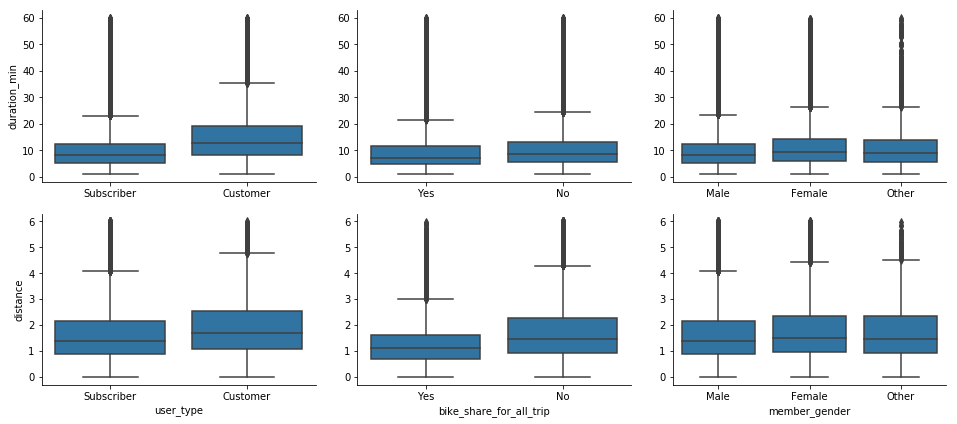

In [33]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike_share_no_nulls, y_vars = ['duration_min', 'distance'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

. The distance in customer's rides is slightly higher than the distance in suscriber's rides.

. The duration of customer's rides is slightly higher than the duration of suscriber's rides.

. The distance in rides that are not included in the bike share for all trip program is slightly higher than the distance of rides that are included in the bike share for all trip program.

. The duration of rides that are not included in the bike share for all trip program is slightly higher than the duration of rides that are included in the bike share for all trip program.

. The distance and duration of rides in females are slightly higher than the distance and duration of rides of males.

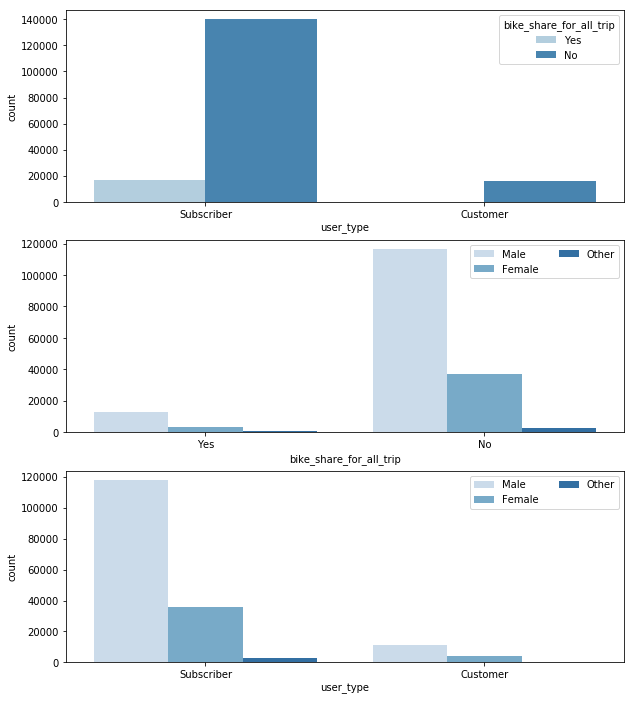

In [34]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 12])

# subplot 1: user type vs bike_share for all trip
plt.subplot(3, 1, 1)
sb.countplot(data = bike_share_no_nulls, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 2: bike share for all trip vs. member gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike_share_no_nulls, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member gender vs. user type, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike_share_no_nulls, x = 'user_type', hue = 'member_gender', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

. Suscribers are the only ones that use the bike share for all trip program. On the other hand, customers don't use it.

. There are more males than females in the group of riders that use the bike share for all trip program, and in the group of riders that don't use the bike share for all trip program. However, the proportion is similar in both groups.

. There are more males than females in the group of riders that are suscribers, and in the group of riders that are customers. However, the proportion is similar in both groups.

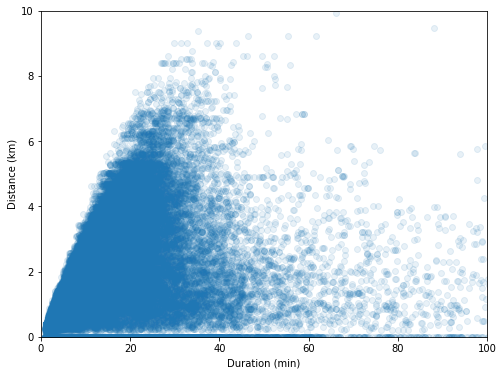

In [35]:
# scatter plot of distance and trip duration

plt.figure(figsize = [8, 6])
plt.scatter(data = bike_share, x = 'duration_min', y = 'distance', alpha = 1/10)
plt.xlim([0, 100])
plt.ylim([0, 10])
plt.xlabel('Duration (min)')
plt.ylabel('Distance (km)')
plt.show()

Although distance and duration show only a weak positive correlation, there is a ceiling of distance that varies linearly with duration in a straight line.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Surprisingly, there's only a weak positive correlation between the distance between the start and end station, and the ride duration. The correlation is just 0.141, lower than expected. Also, the distance and duration of customers, females and those who don't use the bike share for all program is slightly higher than the one of the alternatives.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Suscribers are the only ones that use the bike share for all trip program. On the other hand, customers don't use it. Also, the proportion between males and females doesn't seem to be affected by the bike share for all trip program, and by user type.

## Multivariate Exploration



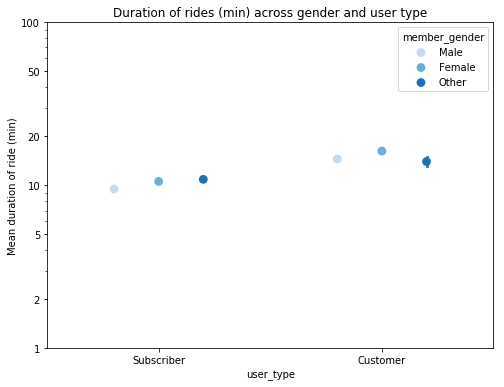

In [36]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share_no_nulls, x = 'user_type', y = 'duration_min', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of rides (min) across gender and user type')
plt.ylabel('Mean duration of ride (min)')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], ['1', '2', '5', '10', '20', '50', '100'])
ax.set_yticklabels([],minor = True)
plt.show();

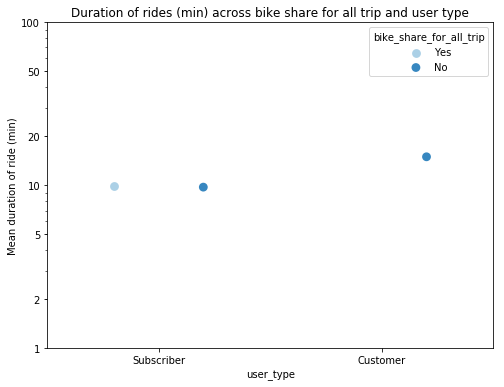

In [37]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share_no_nulls, x = 'user_type', y = 'duration_min', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of rides (min) across bike share for all trip and user type')
plt.ylabel('Mean duration of ride (min)')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], ['1', '2', '5', '10', '20', '50', '100'])
ax.set_yticklabels([],minor = True)
plt.show();

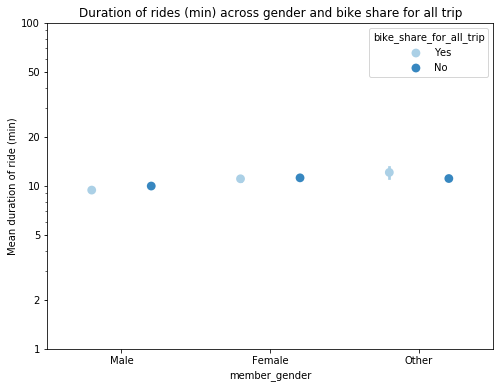

In [38]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share_no_nulls, x = 'member_gender', y = 'duration_min', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of rides (min) across gender and bike share for all trip')
plt.ylabel('Mean duration of ride (min)')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], ['1', '2', '5', '10', '20', '50', '100'])
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The graph showing duration of rides (min) across gender and user type, illustrates how females have a slightly higher mean ride duration than males in both customers and suscribers. Also, it shows how the longest trips are made by females that are customers.

### Were there any interesting or surprising interactions between features?

> The graphs showing how the three categorical variables affect the duration of rides, show how user has a higher effect on trip duration than gender and wether they are or not in the bike share for all trip program.

## Conclusions

The main findings of this report are the following:

. The distributions of distance and trip duration are approximately normal when plotted in a logarithmic scale. If plotted with a regular scale, they adopt a distribution skewed to the right.

. There are significantly more suscribers than customers, more males than females and more users that are not participating in the bike share for all trip program.

. Surprisingly, there is a very weak correlation between distance and duration. However, if we plot trip duration, there's a "cealing" of distance, that varies linearly with trip duration.

. The main trends that can be observed are that customers have a higher trip duration than suscribers, and that those who are not involved in the bike share for all trip program have a higher distance than those who are involved.

The main steps taken in this report were the following:

. Seconds were changed to minutes to have an easier interpretation of the data.

. Distance was calculated using initial and final longitudes and latitude using the haversine formula.

. Distance and trip duration were changed to a logarithmic scale, so that their distribution was approximately normal.

